# Analysing emodnet files

This is a Notebook for analyzing and merging the netcCDF files from http://portal.emodnet-bathymetry.eu.

In [1]:
import xarray as xr
import numpy as np
import glob

In [2]:
%matplotlib inline

In [3]:
data1 = xr.open_dataset('/Users/brey/DATA/EMODNET/A1.mnt')

In [4]:
data1

<xarray.Dataset>
Dimensions:              (CDI_INDEX_NBR: 32768, COLUMNS: 9480, LAYERS_HEADERS: 20, LINES: 7200, mbHistoryRecNbr: 20)
Coordinates:
  * LINES                (LINES) float64 70.0 70.0 70.01 70.01 70.01 70.01 ...
  * COLUMNS              (COLUMNS) float64 -36.0 -36.0 -35.99 -35.99 -35.99 ...
Dimensions without coordinates: CDI_INDEX_NBR, LAYERS_HEADERS, mbHistoryRecNbr
Data variables:
    mbHistDate           (mbHistoryRecNbr) float64 ...
    mbHistTime           (mbHistoryRecNbr) float64 ...
    mbHistCode           (mbHistoryRecNbr) float32 ...
    mbHistAutor          (mbHistoryRecNbr) |S20 ...
    mbHistModule         (mbHistoryRecNbr) |S20 ...
    mbHistComment        (mbHistoryRecNbr) |S256 ...
    Layer_name           (LAYERS_HEADERS) |S20 ...
    DEPTH                (LINES, COLUMNS) float32 ...
    MIN_SOUNDING         (LINES, COLUMNS) float32 ...
    MAX_SOUNDING         (LINES, COLUMNS) float32 ...
    VSOUNDINGS           (LINES, COLUMNS) float64 ...
    STDEV 

In [35]:
data1.mbHistTime

<xarray.DataArray 'mbHistTime' (mbHistoryRecNbr: 20)>
array([36792548.,        0.,        0.,        0.,        0.,        0.,
              0.,        0.,        0.,        0.,        0.,        0.,
              0.,        0.,        0.,        0.,        0.,        0.,
              0.,        0.])
Dimensions without coordinates: mbHistoryRecNbr
Attributes:
    type:           integer
    long_name:      History time (UT)
    name_code:      MB_HISTORY_TIME
    units:          ms
    unit_code:      MB_MS
    minimum:        0
    maximum:        86399999
    valid_minimum:  0
    valid_maximum:  86399999
    format_C:       %d
    orientation:    direct

In [5]:
v2=data1.DEPTH.max(); v1 = data1.DEPTH.min()

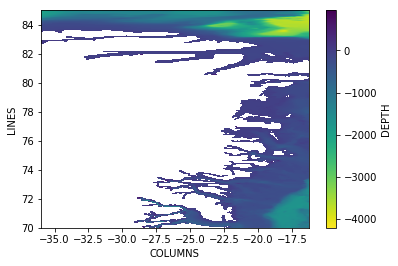

In [6]:
data1.DEPTH.plot(vmin=v1, vmax=v2, cmap='viridis_r')

In [7]:
np.sum(np.isnan(data1.DEPTH.values)) # number of Nan values

46452312

In [8]:
data1.DEPTH.shape

(7200, 9480)

In [9]:
np.sum(data1.DEPTH.values>0.) # Total positive (land) values

/Users/brey/miniconda3/envs/dev/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


582773

## Merge together the netcdf files

In [18]:
files = glob.glob('/Users/brey/DATA/EMODNET/*.mnt')
files.sort()
files

['/Users/brey/DATA/EMODNET/A1.mnt',
 '/Users/brey/DATA/EMODNET/A2.mnt',
 '/Users/brey/DATA/EMODNET/A3.mnt',
 '/Users/brey/DATA/EMODNET/A4.mnt',
 '/Users/brey/DATA/EMODNET/B1.mnt',
 '/Users/brey/DATA/EMODNET/B2.mnt',
 '/Users/brey/DATA/EMODNET/B3.mnt',
 '/Users/brey/DATA/EMODNET/B4.mnt',
 '/Users/brey/DATA/EMODNET/C1.mnt',
 '/Users/brey/DATA/EMODNET/C2.mnt',
 '/Users/brey/DATA/EMODNET/C3.mnt',
 '/Users/brey/DATA/EMODNET/C4.mnt',
 '/Users/brey/DATA/EMODNET/D1.mnt',
 '/Users/brey/DATA/EMODNET/D2.mnt',
 '/Users/brey/DATA/EMODNET/D3.mnt',
 '/Users/brey/DATA/EMODNET/D4.mnt']

In [32]:
concat_vars=['DEPTH','DEPTH_SMOOTH','DEPTH_SMOOTH_OFFSET','INTERPOLATION_FLAG',
             'STDEV','CDI','VSOUNDINGS','MIN_SOUNDING','MAX_SOUNDING']

In [41]:
drop_vars = ['mbHistDate','mbHistTime','mbHistCode','mbHistAutor','mbHistModule','mbHistComment','Layer_name','CDI_INDEX']

### A Part

In [48]:
afiles = files[:4][::-1]
afiles

['/Users/brey/DATA/EMODNET/A4.mnt',
 '/Users/brey/DATA/EMODNET/A3.mnt',
 '/Users/brey/DATA/EMODNET/A2.mnt',
 '/Users/brey/DATA/EMODNET/A1.mnt']

In [39]:
a = xr.open_mfdataset(afiles,concat_dim='LINES')#,data_vars=concat_vars)

In [43]:
a = a.drop(drop_vars)

In [70]:
a

<xarray.Dataset>
Dimensions:              (COLUMNS: 9480, LINES: 28800)
Coordinates:
  * COLUMNS              (COLUMNS) float64 -36.0 -36.0 -35.99 -35.99 -35.99 ...
  * LINES                (LINES) float64 25.0 25.0 25.01 25.01 25.01 25.01 ...
Data variables:
    DEPTH                (LINES, COLUMNS) float32 dask.array<shape=(28800, 9480), chunksize=(7200, 9480)>
    MIN_SOUNDING         (LINES, COLUMNS) float32 dask.array<shape=(28800, 9480), chunksize=(7200, 9480)>
    MAX_SOUNDING         (LINES, COLUMNS) float32 dask.array<shape=(28800, 9480), chunksize=(7200, 9480)>
    VSOUNDINGS           (LINES, COLUMNS) float64 dask.array<shape=(28800, 9480), chunksize=(7200, 9480)>
    STDEV                (LINES, COLUMNS) float32 dask.array<shape=(28800, 9480), chunksize=(7200, 9480)>
    CDI                  (LINES, COLUMNS) float32 dask.array<shape=(28800, 9480), chunksize=(7200, 9480)>
    DEPTH_SMOOTH         (LINES, COLUMNS) float32 dask.array<shape=(28800, 9480), chunksize=(7200, 9480)

In [44]:
a.to_netcdf('/Users/brey/DATA/EMODNET/A.nc')

/Users/brey/miniconda3/envs/dev/lib/python2.7/site-packages/xarray/conventions.py:748: SerializationWarning: saving variable DEPTH with floating point data as an integer dtype without any _FillValue to use for NaNs
  for k, v in iteritems(variables))
/Users/brey/miniconda3/envs/dev/lib/python2.7/site-packages/xarray/conventions.py:748: SerializationWarning: saving variable MIN_SOUNDING with floating point data as an integer dtype without any _FillValue to use for NaNs
  for k, v in iteritems(variables))
/Users/brey/miniconda3/envs/dev/lib/python2.7/site-packages/xarray/conventions.py:748: SerializationWarning: saving variable MAX_SOUNDING with floating point data as an integer dtype without any _FillValue to use for NaNs
  for k, v in iteritems(variables))
/Users/brey/miniconda3/envs/dev/lib/python2.7/site-packages/xarray/conventions.py:748: SerializationWarning: saving variable VSOUNDINGS with floating point data as an integer dtype without any _FillValue to use for NaNs
  for k, v in

In [45]:
at=xr.open_mfdataset('/Users/brey/DATA/EMODNET/A.nc')

In [46]:
at

<xarray.Dataset>
Dimensions:              (COLUMNS: 9480, LINES: 28800)
Coordinates:
  * COLUMNS              (COLUMNS) float64 -36.0 -36.0 -35.99 -35.99 -35.99 ...
  * LINES                (LINES) float64 25.0 25.0 25.01 25.01 25.01 25.01 ...
Data variables:
    DEPTH                (LINES, COLUMNS) float32 dask.array<shape=(28800, 9480), chunksize=(28800, 9480)>
    MIN_SOUNDING         (LINES, COLUMNS) float32 dask.array<shape=(28800, 9480), chunksize=(28800, 9480)>
    MAX_SOUNDING         (LINES, COLUMNS) float32 dask.array<shape=(28800, 9480), chunksize=(28800, 9480)>
    VSOUNDINGS           (LINES, COLUMNS) float64 dask.array<shape=(28800, 9480), chunksize=(28800, 9480)>
    STDEV                (LINES, COLUMNS) float32 dask.array<shape=(28800, 9480), chunksize=(28800, 9480)>
    CDI                  (LINES, COLUMNS) float32 dask.array<shape=(28800, 9480), chunksize=(28800, 9480)>
    DEPTH_SMOOTH         (LINES, COLUMNS) float32 dask.array<shape=(28800, 9480), chunksize=(28800

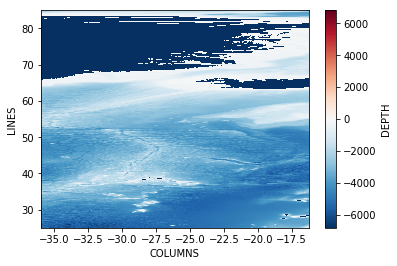

In [47]:
at.DEPTH.plot()

### B Part

In [49]:
bfiles = files[4:8][::-1]
bfiles

['/Users/brey/DATA/EMODNET/B4.mnt',
 '/Users/brey/DATA/EMODNET/B3.mnt',
 '/Users/brey/DATA/EMODNET/B2.mnt',
 '/Users/brey/DATA/EMODNET/B1.mnt']

In [50]:
b = xr.open_mfdataset(bfiles,concat_dim='LINES')#,data_vars=concat_vars)

In [51]:
b = b.drop(drop_vars)

In [52]:
b.to_netcdf('/Users/brey/DATA/EMODNET/B.nc')

In [74]:
bt=xr.open_mfdataset('/Users/brey/DATA/EMODNET/B.nc')

bt

<xarray.Dataset>
Dimensions:              (COLUMNS: 9480, LINES: 28800)
Coordinates:
  * COLUMNS              (COLUMNS) float64 -16.25 -16.25 -16.24 -16.24 ...
  * LINES                (LINES) float64 25.0 25.0 25.01 25.01 25.01 25.01 ...
Data variables:
    DEPTH                (LINES, COLUMNS) float32 dask.array<shape=(28800, 9480), chunksize=(28800, 9480)>
    MIN_SOUNDING         (LINES, COLUMNS) float32 dask.array<shape=(28800, 9480), chunksize=(28800, 9480)>
    MAX_SOUNDING         (LINES, COLUMNS) float32 dask.array<shape=(28800, 9480), chunksize=(28800, 9480)>
    VSOUNDINGS           (LINES, COLUMNS) float64 dask.array<shape=(28800, 9480), chunksize=(28800, 9480)>
    STDEV                (LINES, COLUMNS) float32 dask.array<shape=(28800, 9480), chunksize=(28800, 9480)>
    CDI                  (LINES, COLUMNS) float32 dask.array<shape=(28800, 9480), chunksize=(28800, 9480)>
    DEPTH_SMOOTH         (LINES, COLUMNS) float32 dask.array<shape=(28800, 9480), chunksize=(28800, 948

### C Part

In [54]:
cfiles = files[8:12][::-1]
cfiles

['/Users/brey/DATA/EMODNET/C4.mnt',
 '/Users/brey/DATA/EMODNET/C3.mnt',
 '/Users/brey/DATA/EMODNET/C2.mnt',
 '/Users/brey/DATA/EMODNET/C1.mnt']

In [55]:
c = xr.open_mfdataset(cfiles,concat_dim='LINES')#,data_vars=concat_vars)

In [56]:
c = c.drop(drop_vars)

In [57]:
c.to_netcdf('/Users/brey/DATA/EMODNET/C.nc')

In [75]:
ct=xr.open_mfdataset('/Users/brey/DATA/EMODNET/C.nc')

ct

<xarray.Dataset>
Dimensions:              (COLUMNS: 9480, LINES: 26272)
Coordinates:
  * COLUMNS              (COLUMNS) float64 3.501 3.503 3.505 3.507 3.509 ...
  * LINES                (LINES) float64 30.27 30.27 30.27 30.27 30.28 30.28 ...
Data variables:
    DEPTH                (LINES, COLUMNS) float32 dask.array<shape=(26272, 9480), chunksize=(26272, 9480)>
    MIN_SOUNDING         (LINES, COLUMNS) float32 dask.array<shape=(26272, 9480), chunksize=(26272, 9480)>
    MAX_SOUNDING         (LINES, COLUMNS) float32 dask.array<shape=(26272, 9480), chunksize=(26272, 9480)>
    VSOUNDINGS           (LINES, COLUMNS) float64 dask.array<shape=(26272, 9480), chunksize=(26272, 9480)>
    STDEV                (LINES, COLUMNS) float32 dask.array<shape=(26272, 9480), chunksize=(26272, 9480)>
    CDI                  (LINES, COLUMNS) float32 dask.array<shape=(26272, 9480), chunksize=(26272, 9480)>
    DEPTH_SMOOTH         (LINES, COLUMNS) float32 dask.array<shape=(26272, 9480), chunksize=(26272,

### D Part

In [58]:
dfiles = files[12:][::-1]
dfiles

['/Users/brey/DATA/EMODNET/D4.mnt',
 '/Users/brey/DATA/EMODNET/D3.mnt',
 '/Users/brey/DATA/EMODNET/D2.mnt',
 '/Users/brey/DATA/EMODNET/D1.mnt']

In [59]:
d = xr.open_mfdataset(dfiles,concat_dim='LINES')#,data_vars=concat_vars)

In [60]:
d = d.drop(drop_vars)

In [61]:
d.to_netcdf('/Users/brey/DATA/EMODNET/D.nc')

In [73]:
dt=xr.open_mfdataset('/Users/brey/DATA/EMODNET/D.nc')

dt

<xarray.Dataset>
Dimensions:              (COLUMNS: 9480, LINES: 24155)
Coordinates:
  * COLUMNS              (COLUMNS) float64 23.25 23.25 23.26 23.26 23.26 ...
  * LINES                (LINES) float64 25.0 25.0 25.01 25.01 25.01 25.01 ...
Data variables:
    DEPTH                (LINES, COLUMNS) float32 dask.array<shape=(24155, 9480), chunksize=(24155, 9480)>
    MIN_SOUNDING         (LINES, COLUMNS) float32 dask.array<shape=(24155, 9480), chunksize=(24155, 9480)>
    MAX_SOUNDING         (LINES, COLUMNS) float32 dask.array<shape=(24155, 9480), chunksize=(24155, 9480)>
    VSOUNDINGS           (LINES, COLUMNS) float64 dask.array<shape=(24155, 9480), chunksize=(24155, 9480)>
    STDEV                (LINES, COLUMNS) float32 dask.array<shape=(24155, 9480), chunksize=(24155, 9480)>
    CDI                  (LINES, COLUMNS) float32 dask.array<shape=(24155, 9480), chunksize=(24155, 9480)>
    DEPTH_SMOOTH         (LINES, COLUMNS) float32 dask.array<shape=(24155, 9480), chunksize=(24155, 9

### Put All together

In [102]:
at.combine_first(bt)

<xarray.Dataset>
Dimensions:              (COLUMNS: 18960, LINES: 28800)
Coordinates:
  * COLUMNS              (COLUMNS) float64 -36.0 -36.0 -35.99 -35.99 -35.99 ...
  * LINES                (LINES) float64 25.0 25.0 25.01 25.01 25.01 25.01 ...
Data variables:
    DEPTH                (LINES, COLUMNS) float32 dask.array<shape=(28800, 18960), chunksize=(28800, 18960)>
    MIN_SOUNDING         (LINES, COLUMNS) float32 dask.array<shape=(28800, 18960), chunksize=(28800, 18960)>
    MAX_SOUNDING         (LINES, COLUMNS) float32 dask.array<shape=(28800, 18960), chunksize=(28800, 18960)>
    VSOUNDINGS           (LINES, COLUMNS) float64 dask.array<shape=(28800, 18960), chunksize=(28800, 18960)>
    STDEV                (LINES, COLUMNS) float32 dask.array<shape=(28800, 18960), chunksize=(28800, 18960)>
    CDI                  (LINES, COLUMNS) float32 dask.array<shape=(28800, 18960), chunksize=(28800, 18960)>
    DEPTH_SMOOTH         (LINES, COLUMNS) float32 dask.array<shape=(28800, 18960), ch

In [101]:
bt.combine_first(ct)

<xarray.Dataset>
Dimensions:              (COLUMNS: 18960, LINES: 29622)
Coordinates:
  * LINES                (LINES) float64 25.0 25.0 25.01 25.01 25.01 25.01 ...
  * COLUMNS              (COLUMNS) float64 -16.25 -16.25 -16.24 -16.24 ...
Data variables:
    DEPTH                (LINES, COLUMNS) float32 dask.array<shape=(29622, 18960), chunksize=(29622, 18960)>
    MIN_SOUNDING         (LINES, COLUMNS) float32 dask.array<shape=(29622, 18960), chunksize=(29622, 18960)>
    MAX_SOUNDING         (LINES, COLUMNS) float32 dask.array<shape=(29622, 18960), chunksize=(29622, 18960)>
    VSOUNDINGS           (LINES, COLUMNS) float64 dask.array<shape=(29622, 18960), chunksize=(29622, 18960)>
    STDEV                (LINES, COLUMNS) float32 dask.array<shape=(29622, 18960), chunksize=(29622, 18960)>
    CDI                  (LINES, COLUMNS) float32 dask.array<shape=(29622, 18960), chunksize=(29622, 18960)>
    DEPTH_SMOOTH         (LINES, COLUMNS) float32 dask.array<shape=(29622, 18960), chunksi

In [98]:
xr.concat([bt,ct], dim='COLUMNS')

<xarray.Dataset>
Dimensions:              (COLUMNS: 18960, LINES: 29622)
Coordinates:
  * LINES                (LINES) float64 25.0 25.0 25.01 25.01 25.01 25.01 ...
  * COLUMNS              (COLUMNS) float64 -16.25 -16.25 -16.24 -16.24 ...
Data variables:
    DEPTH                (LINES, COLUMNS) float32 dask.array<shape=(29622, 18960), chunksize=(29622, 9480)>
    MIN_SOUNDING         (LINES, COLUMNS) float32 dask.array<shape=(29622, 18960), chunksize=(29622, 9480)>
    MAX_SOUNDING         (LINES, COLUMNS) float32 dask.array<shape=(29622, 18960), chunksize=(29622, 9480)>
    VSOUNDINGS           (LINES, COLUMNS) float64 dask.array<shape=(29622, 18960), chunksize=(29622, 9480)>
    STDEV                (LINES, COLUMNS) float32 dask.array<shape=(29622, 18960), chunksize=(29622, 9480)>
    CDI                  (LINES, COLUMNS) float32 dask.array<shape=(29622, 18960), chunksize=(29622, 9480)>
    DEPTH_SMOOTH         (LINES, COLUMNS) float32 dask.array<shape=(29622, 18960), chunksize=(29

In [79]:
e

<xarray.Dataset>
Dimensions:              (COLUMNS: 37920, LINES: 108027)
Coordinates:
  * COLUMNS              (COLUMNS) float64 -36.0 -36.0 -35.99 -35.99 -35.99 ...
  * LINES                (LINES) float64 25.0 25.0 25.01 25.01 25.01 25.01 ...
Data variables:
    DEPTH                (LINES, COLUMNS) float32 dask.array<shape=(108027, 37920), chunksize=(28800, 37920)>
    MIN_SOUNDING         (LINES, COLUMNS) float32 dask.array<shape=(108027, 37920), chunksize=(28800, 37920)>
    MAX_SOUNDING         (LINES, COLUMNS) float32 dask.array<shape=(108027, 37920), chunksize=(28800, 37920)>
    VSOUNDINGS           (LINES, COLUMNS) float64 dask.array<shape=(108027, 37920), chunksize=(28800, 37920)>
    STDEV                (LINES, COLUMNS) float32 dask.array<shape=(108027, 37920), chunksize=(28800, 37920)>
    CDI                  (LINES, COLUMNS) float32 dask.array<shape=(108027, 37920), chunksize=(28800, 37920)>
    DEPTH_SMOOTH         (LINES, COLUMNS) float32 dask.array<shape=(108027, 37

In [61]:
e.to_netcdf('/Users/brey/DATA/EMODNET/emodnet.nc')

### CHECK

In [28]:
emodnet = xr.open_mfdataset('/Users/brey/DATA/emodnet_bathymetry.nc')

In [40]:
emodnet

<xarray.Dataset>
Dimensions:    (latitude: 28800, longitude: 37920)
Coordinates:
  * longitude  (longitude) float64 -36.0 -36.0 -35.99 -35.99 -35.99 -35.99 ...
  * latitude   (latitude) float64 25.0 25.0 25.01 25.01 25.01 25.01 25.01 ...
Data variables:
    depth      (latitude, longitude) float64 dask.array<shape=(28800, 37920), chunksize=(28800, 37920)>
Attributes:
    title:          EMODnet Bathymetry
    Institution:    Joint European Research Centre, Directorate for Space, Se...
    Project Name:   COAST
    History:        The file was created by extracting the variable depth fro...
    Creation Date:  20/09/2017
    version:        1.0